In [ ]:
# Importing necessary libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset

In [ ]:
df_data = pd.read_csv('employee_data.csv', sep='\t')
df_data.head(30)

,age,employment_type,salary,education,marital-status,relationship,Gender,hours_per_week
0,39,State-gov,77516,Bachelors,Never-married,Not-in-family,Male,40
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Husband,Male,13
2,38,Private,215646,HS-grad,Divorced,Not-in-family,Male,40
3,53,Private,234721,11th,Married-civ-spouse,Husband,Male,40
4,28,Private,338409,Bachelors,Married-civ-spouse,Wife,Female,40
5,37,Private,284582,Masters,Married-civ-spouse,Wife,Female,40
6,49,Private,160187,9th,Married-spouse-absent,Not-in-family,Female,16
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Husband,Male,45
8,31,Private,45781,Masters,Never-married,Not-in-family,Female,50
9,42,Private,159449,Bachelors,Married-civ-spouse,Husband,Male,40


In [ ]:
# Finding the size of the dataset
print(f"No. of Rows = {df_data.shape[0]}" +"\n"+f"No. of Columns = {df_data.shape[1]}")

No. of Rows = 978
No. of Columns = 8


In [ ]:
# The columns present in the dataset
df_data.columns

Index(['age', 'employment_type', 'salary', 'education', 'marital-status',
       'relationship', 'Gender', 'hours_per_week'],
      dtype='object')

In [ ]:
# Describing the different Statistical Parameters
df_data.describe()

,age,salary,hours_per_week
count,978.000000,9.780000e+02,978.000000
mean,37.880368,1.918922e+05,39.838446
std,13.328501,1.085016e+05,12.095512
min,17.000000,2.117400e+04,1.000000
25%,28.000000,1.147938e+05,40.000000
50%,36.000000,1.804730e+05,40.000000
75%,46.000000,2.458695e+05,45.000000
max,90.000000,1.033222e+06,99.000000


# **PART 1:**

> **Identifying Categorical and Continuous Variables**


> Categorical Variable:

1. Education
2. Employment_type
3. Relationship
4. Gender
5. Marital-status
6. List item

> Continuous Variables:

1. Age
2. Salary
3. Hours_per_week











In [ ]:
# CONTINUOUS DATA FEATURES:
num_cols = df_data._get_numeric_data().columns
cont_cols = []
for i in num_cols:
  if(len(df_data[i].unique())) > int(df_data.shape[0]/25):
     cont_cols.append(i)
print("Continuous Data Features are:"+"\n")
print (cont_cols)

Continuous Data Features are:

['age', 'salary', 'hours_per_week']


In [ ]:
# CATEGORICAL DATA FEATURES:
cat_cols = list(set(df_data.columns) - set(cont_cols))
print("Categorical Data Features are:"+"\n")
cat_cols

Categorical Data Features are:



['marital-status', 'employment_type', 'Gender', 'education', 'relationship']

# **PART 2:**

> **Univariate analysis on all the Variables**


> INFERENCES-


1(a).   Maximum people(almost 700) work in Private sectors.
1(b).   Least number of people(20) work in the Federal-Government Sector. 
2.      Most employees are High School Grads and have a Bachelors Degree, while very few of the employees have education upto Pre-school.
3.      Most employees are married and have a civilian spouse, and very few have a spouse in the armed forces. 
4.      Most employees are husbands.
5.      The number of male employees are much more than the female employees, which suggests a male-dominant working environment.







In [85]:
# Function to draw Bar Plots for categorical columns
def bar_plot(dataframe, features):
  # Creating plot
  a = dataframe[features]
  fig = plt.figure(figsize =(20, 7))  
  sns.countplot(a, color = 'Pink')  
  plt.title(f"{features} Histogram")  
  # show plot
  plt.show()

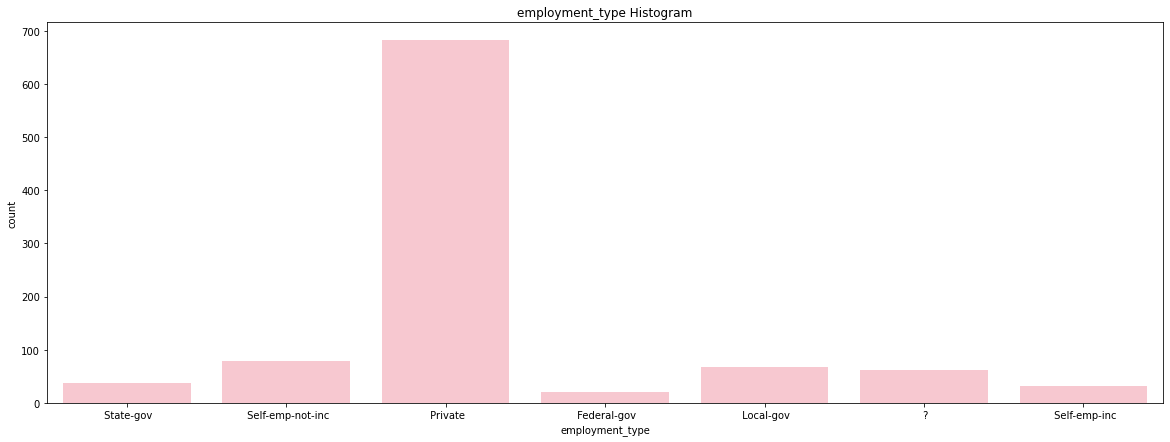

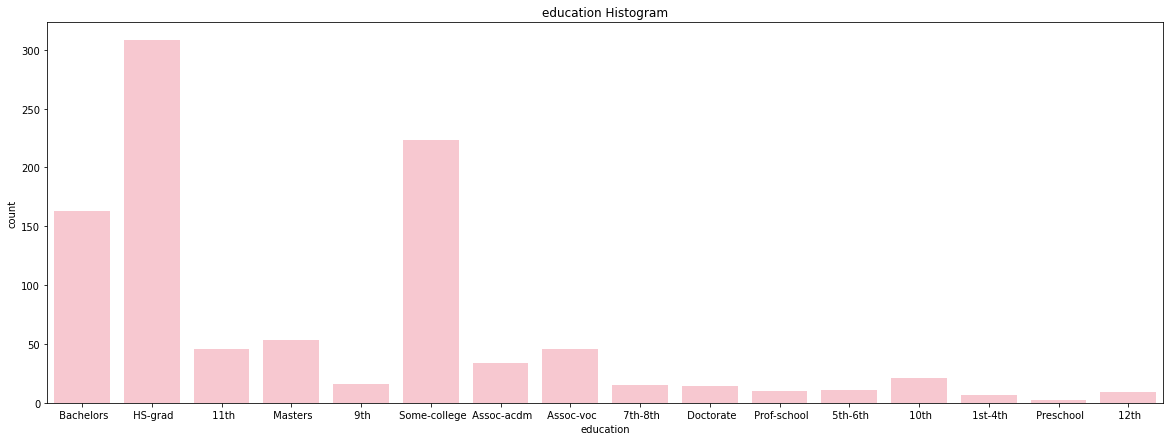

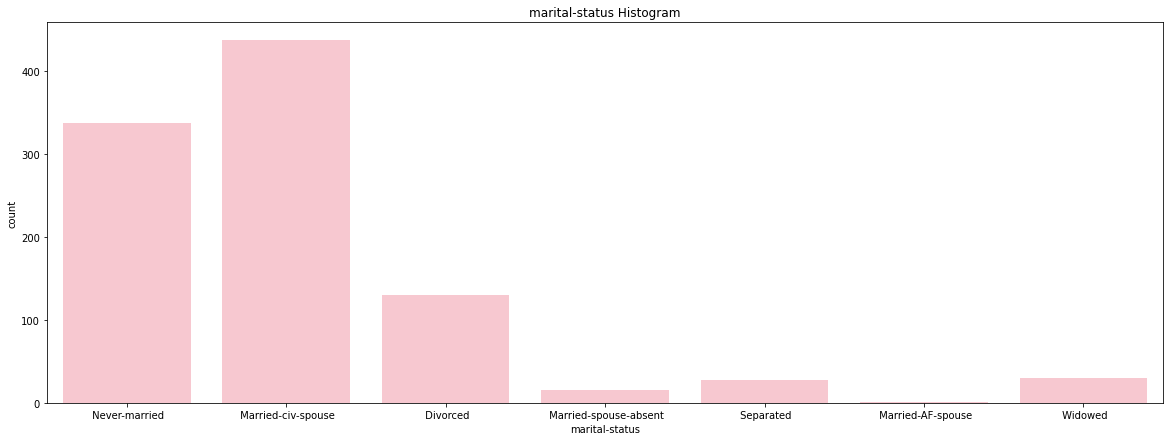

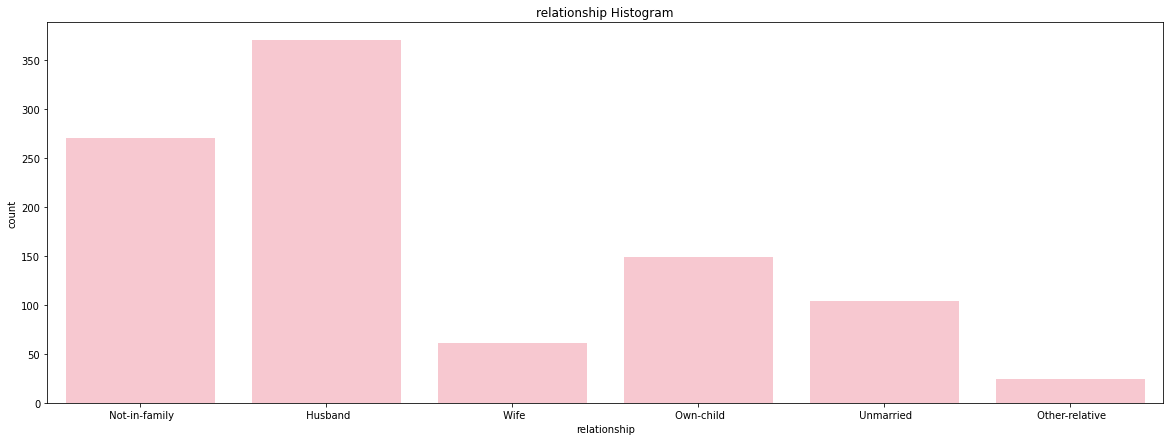

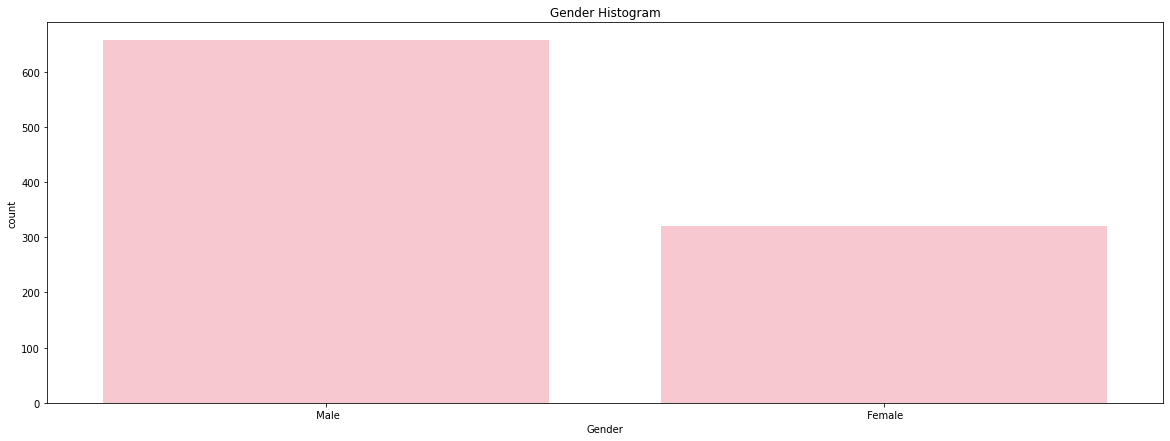

In [86]:
for i in df_data.columns:
  if i in cat_cols:
    bar_plot(df_data, i)



> **Continuous Data Features**



*INFERENCES*


1.      Most employees are within the age group of 20-45.
2.      Most employees are given a salary ranginf from 0.1 tp 0.3 units.
3.      Majority of the employees(approximately 500) work for 30-40 hours per week.


In [89]:
# Function to draw Histograms for continuous columns
def histogram_plot(dataframe, features):
  # Creating plot
  a = dataframe[features]
  fig = plt.figure(figsize =(10, 7))     
  plt.hist(a, color = 'Purple', histtype='barstacked')
  plt.xlabel(features)
  plt.ylabel('Count')  
  plt.title(f"{features} Histogram")  
  # show plot
  plt.show()

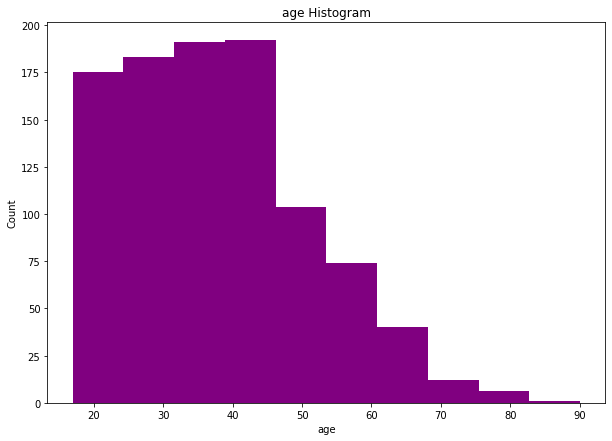

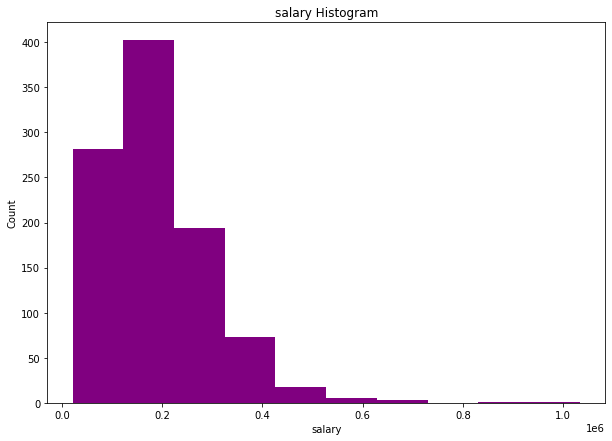

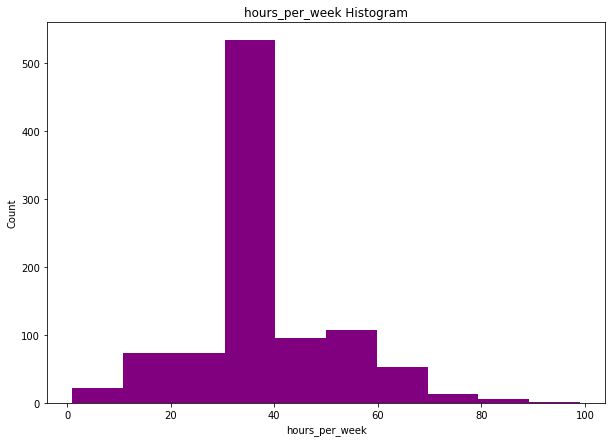

In [90]:
for i in df_data.columns:
  if i in cont_cols:
    histogram_plot(df_data, i)

# **PART 3:**


> *Bivariate* *analysis between Salary and hour_per_week*






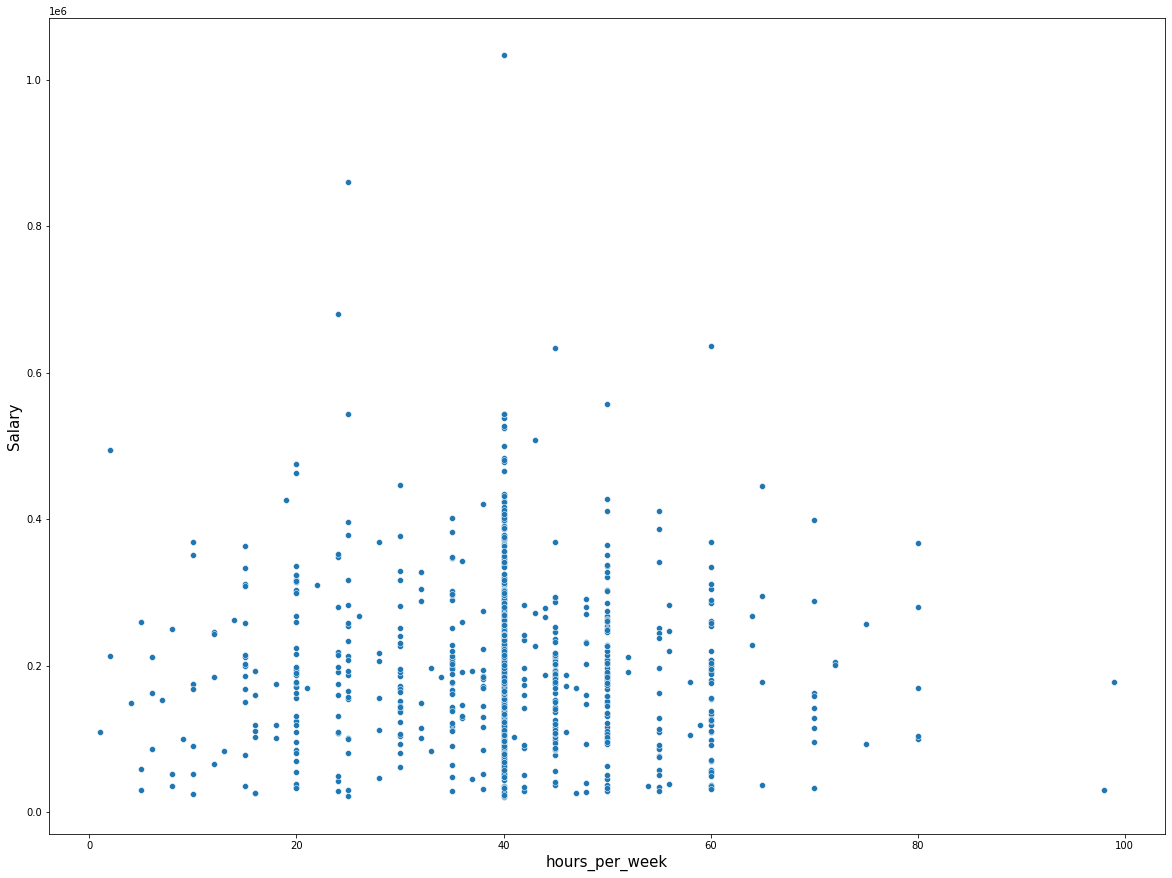

In [93]:
# Identifying relationship between Applicant Income against the Number of working hours in a week 
fig, a = plt.subplots(figsize=(20,15))
plt.ylabel('Salary', fontdict={'fontsize':15})
plt.xlabel('hours_per_week', fontdict={'fontsize':15})
sns.scatterplot(x="hours_per_week", y="salary", data=df_data )

*INFERENCES-*


1.   In the ScatterPlot, we observe that people working the same number of hours per week, have been given different salaries; some very low, and some are very high. This might suggest a variety of roles in the office. 
2.   In general, as the number of working hours increases, the salary also increases. 



# **PART 4:**

*> Distribution of Salary for each Education type*

> *INFERENCES-*

1.   Highest salary is given to High School Graduates, people with a Bachelors degree, or with degree from some college.
2.   Majority of the employees are either HighSchool graduates or have a Bachelors degree. 




In [ ]:
# Number of unique elements in the "education" category
len(df_data["education"].unique())

16

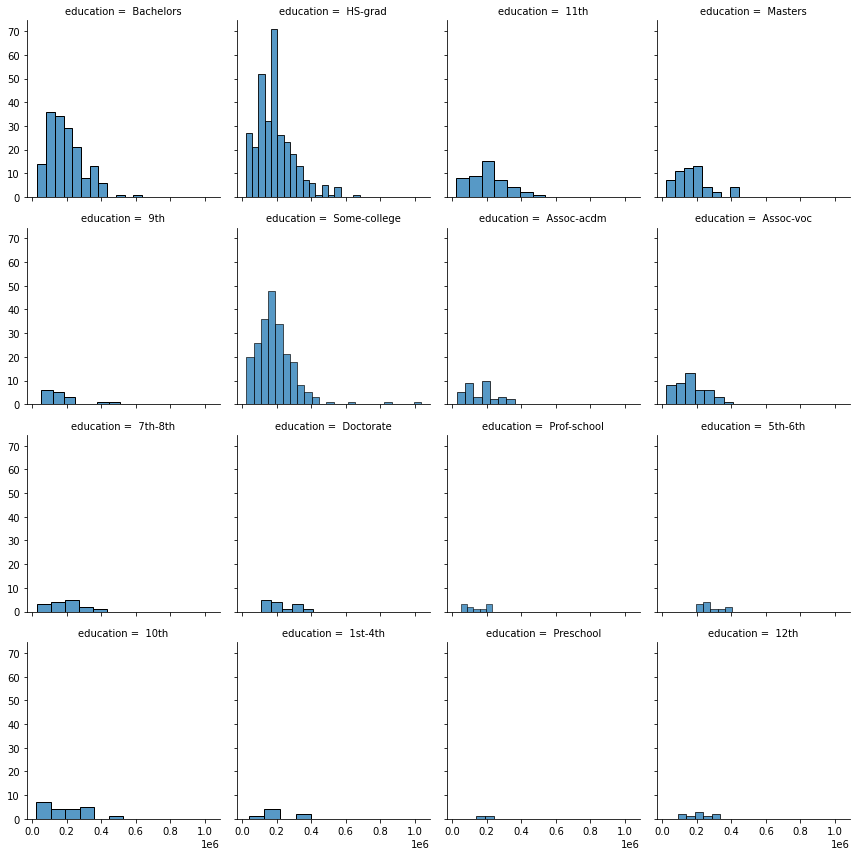

In [98]:
g = sns.FacetGrid(df_data, col="education", col_wrap= 4)
g.map_dataframe(sns.histplot, x="salary")

# **PART 5:**

> Categorizing Gender and Relationship status to plot the hours_per_week worked

> *INFERENCES-*

1.   We find that there are two exceptions in the relationships 'Husbands' and 'Wives', wherein the male and female genders are dominant respectively. 
2.   It is a male-dominant workplace.
3.   Majority of women employees are Not-in-a-family, whereas majority of men employees are Husbands.
4.   In general, men and women have equal mean working hours per week, with a few outliers in both categories.
5.   Male outliers work more than Female outliers. 







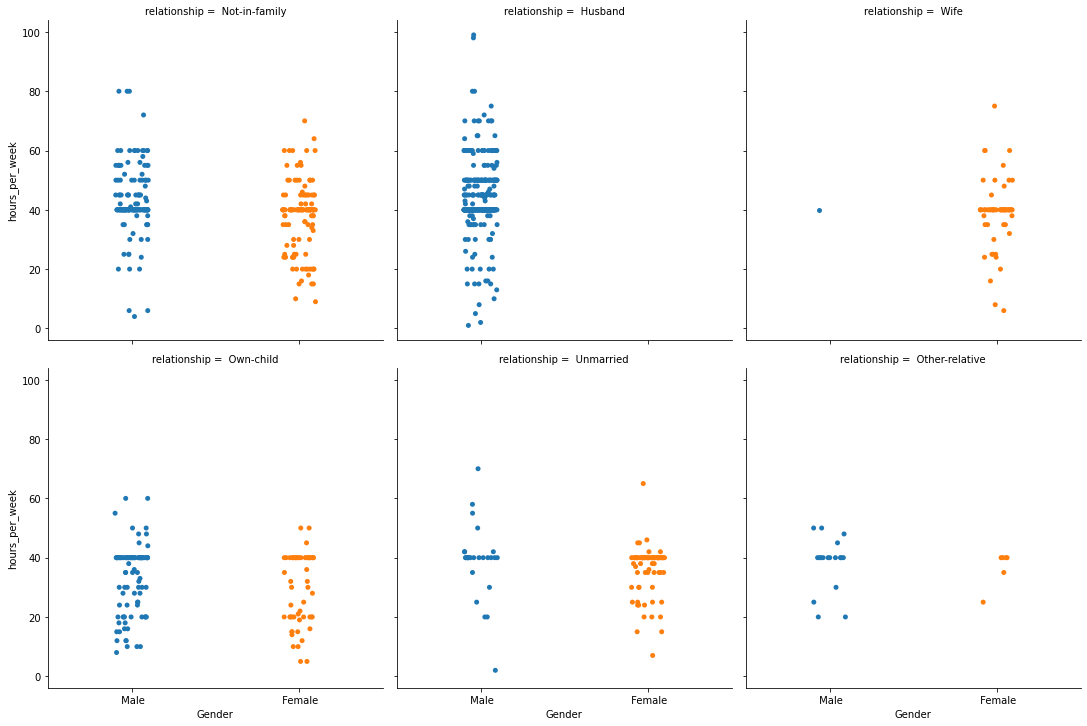

In [113]:
sns.catplot('Gender','hours_per_week', data =df_data, col = 'relationship', col_wrap=3, kind='strip')

# **PART 6:**

> Number of Males with Marital status ‘Married-civ-spouse’, earning above 150,000


> **The number of male individuals with Married-civ-spouse status getting a salary above 150,000 are: 226**




In [ ]:
data = df_data[(df_data["salary"] > 150000) & (df_data["marital-status"].str.contains("Married-civ-spouse")) & (df_data["Gender"].str.contains("Male"))]
data


,age,employment_type,salary,education,marital-status,relationship,Gender,hours_per_week
3,53,Private,234721,11th,Married-civ-spouse,Husband,Male,40
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Husband,Male,45
9,42,Private,159449,Bachelors,Married-civ-spouse,Husband,Male,40
10,37,Private,280464,Some-college,Married-civ-spouse,Husband,Male,80
15,34,Private,245487,7th-8th,Married-civ-spouse,Husband,Male,45
...,...,...,...,...,...,...,...,...
967,55,Self-emp-not-inc,189721,HS-grad,Married-civ-spouse,Husband,Male,20
968,48,Private,164966,Bachelors,Married-civ-spouse,Husband,Male,40
970,34,Private,202046,HS-grad,Married-civ-spouse,Husband,Male,35
973,37,Private,200153,HS-grad,Married-civ-spouse,Husband,Male,40


In [ ]:
print(f"The number of male individuals with Married-civ-spouse status getting a salary above 150,000 are: {len(data)}")

The number of male individuals with Married-civ-spouse status getting a salary above 150,000 are: 226


# **PART 7:**

>Are Divorced Individuals of higher age compared to Individuals that are Not-in-family?


> **The age of people who are Divorced is in general greater than the age of the people Not-in-a-family.**




In [ ]:
# Creating three dataframes to categorize the two types of individuals
# As there  will be some individuals who fall in both the categories, we create three dataframes
# data1 -> for those individuals only with a marital status-Divorced
# data2 -> for those individuals only with a Relationship-status as 'Not in a family
# data3 -> Those individuals who are Divorced and Not in a family.
data1 = df_data[(df_data["marital-status"].str.contains("Divorced")) & (~df_data["relationship"].str.contains("Not-in-family"))]
data2 = df_data[(df_data["relationship"].str.contains("Not-in-family"))&(~(df_data["marital-status"].str.contains("Divorced")))]
data3 = df_data[(df_data["marital-status"].str.contains("Divorced")) & df_data["relationship"].str.contains("Not-in-family")]


In [ ]:
# Printing the leength of each data frame
print(f"Individuals with Marital-status as Divorced is: {len(data1)}")
print(f"Individuals with relationship-status as 'Not in a family' is: {len(data2)}")
print(f"Individuals with relationship-status as 'Not in a family' and Marital-atatus as Divorced is: {len(data3)}")


Individuals with Marital-status as Divorced is: 55
Individuals with relationship-status as 'Not in a family' is: 195
Individuals with relationship-status as 'Not in a family' and Marital-atatus as Divorced is: 75


In [ ]:
data1.head(15)

,age,employment_type,salary,education,marital-status,relationship,Gender,hours_per_week
19,43,Self-emp-not-inc,292175,Masters,Divorced,Unmarried,Female,45
24,59,Private,109015,HS-grad,Divorced,Unmarried,Female,40
32,45,Private,386940,Bachelors,Divorced,Own-child,Male,40
47,44,Private,128354,Masters,Divorced,Unmarried,Female,40
85,53,Private,346253,HS-grad,Divorced,Own-child,Female,35
91,37,Private,286730,Some-college,Divorced,Unmarried,Female,40
92,28,Private,212563,Some-college,Divorced,Unmarried,Female,25
98,48,Private,171095,Assoc-acdm,Divorced,Unmarried,Female,40
150,47,Local-gov,186009,Some-college,Divorced,Unmarried,Female,38
162,44,Self-emp-inc,78374,Masters,Divorced,Unmarried,Female,40


In [ ]:
data2.head(15)

,age,employment_type,salary,education,marital-status,relationship,Gender,hours_per_week
0,39,State-gov,77516,Bachelors,Never-married,Not-in-family,Male,40
6,49,Private,160187,9th,Married-spouse-absent,Not-in-family,Female,16
8,31,Private,45781,Masters,Never-married,Not-in-family,Female,50
13,32,Private,205019,Assoc-acdm,Never-married,Not-in-family,Male,50
30,23,Local-gov,190709,Assoc-acdm,Never-married,Not-in-family,Male,52
44,25,Private,289980,HS-grad,Never-married,Not-in-family,Male,35
49,29,Private,271466,Assoc-voc,Never-married,Not-in-family,Male,43
61,32,?,293936,7th-8th,Married-spouse-absent,Not-in-family,Male,40
73,23,Private,211678,Some-college,Never-married,Not-in-family,Male,40
80,18,Private,446839,HS-grad,Never-married,Not-in-family,Male,30


In [ ]:
data3.head(15)

,age,employment_type,salary,education,marital-status,relationship,Gender,hours_per_week
2,38,Private,215646,HS-grad,Divorced,Not-in-family,Male,40
28,39,Private,367260,HS-grad,Divorced,Not-in-family,Male,80
53,50,Federal-gov,251585,Bachelors,Divorced,Not-in-family,Male,55
54,47,Self-emp-inc,109832,HS-grad,Divorced,Not-in-family,Male,60
64,29,Private,105598,Some-college,Divorced,Not-in-family,Male,58
66,28,Private,183175,Some-college,Divorced,Not-in-family,Female,40
84,44,Private,343591,HS-grad,Divorced,Not-in-family,Female,40
129,39,Private,365739,Some-college,Divorced,Not-in-family,Male,40
134,46,Private,146195,Assoc-acdm,Divorced,Not-in-family,Female,36
149,43,?,174662,Some-college,Divorced,Not-in-family,Female,40


In [ ]:
#Comparing the mean age of both categories 
print(f"Mean Age of Divorced individuals is: {data1.mean()['age']}")
print(f"Mean Age of individuals 'Not in a Family' is: {data2.mean()['age']}")
if data1.mean()['age'] < data2.mean()['age']:
  print("\033[1m"+"The age of individuals 'Not in a family' are more than those who are Divorced "+"\033[0m")
elif data1.mean()['age'] > data2.mean()['age']:
  print("\033[1m"+"The age of individuals who are Divorced are generally older than those who are 'Not in a family'"+"\033[0m")

  sns.lineplot(data=df_data, x='marital-status', y='age', color= "Olive")
sns.lineplot(data=df_data, x='relationship', y='age', color= "Cyan")

Mean Age of Divorced individuals is: 40.67272727272727
Mean Age of individuals 'Not in a Family' is: 35.353846153846156
The age of individuals who are Divorced are generally older than those who are 'Not in a family'


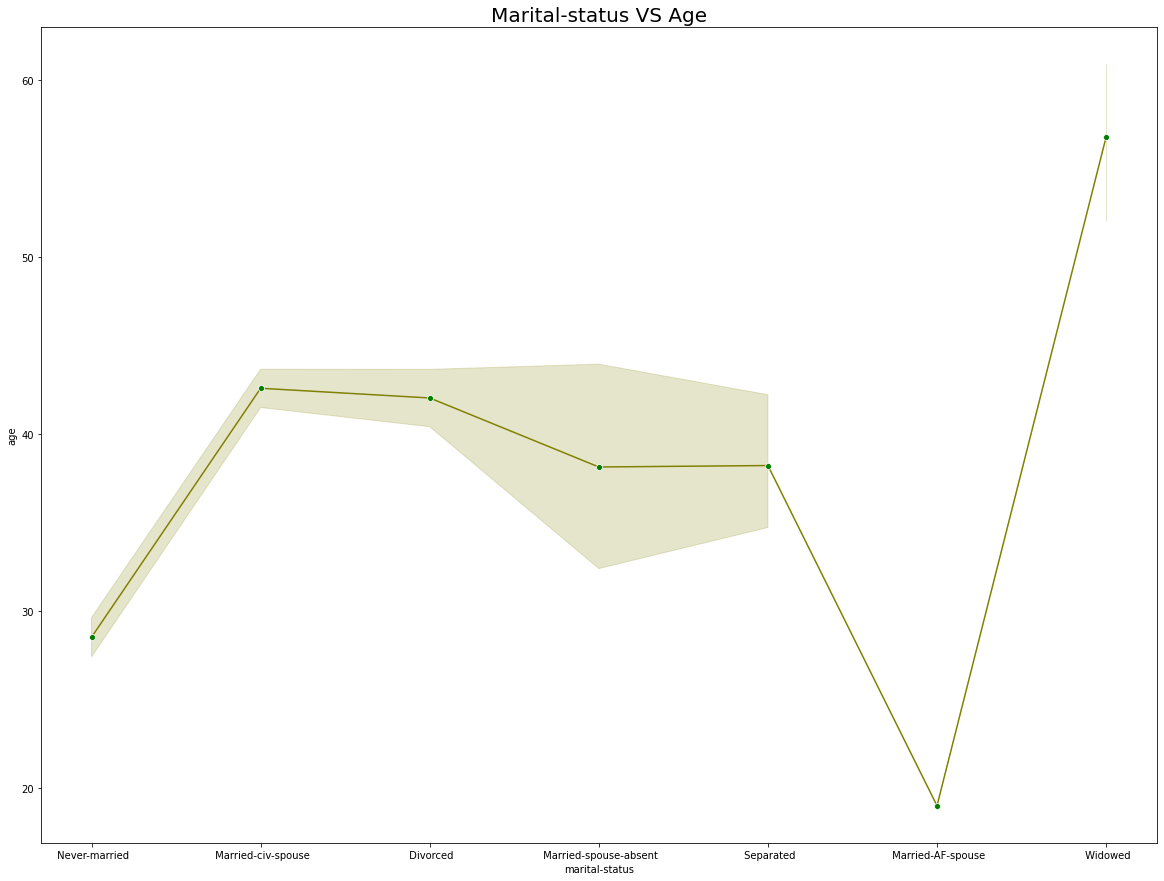

In [ ]:
fig, a = plt.subplots(figsize=(20,15))
plt.title("Marital-status VS Age", fontdict={'fontsize':20})
sns.lineplot(data=df_data, x='marital-status', y='age', color= "Olive", marker='o', markerfacecolor='Green')  

The plot suggests that the mean age of people who are Divorced, is around 42

> Whereas the mean age of people not in a family is around 35.

> **Hence, a conclusion can be drawn that the age of people who are Divorced is in general greater than the age of the people Not-in-a-family.**




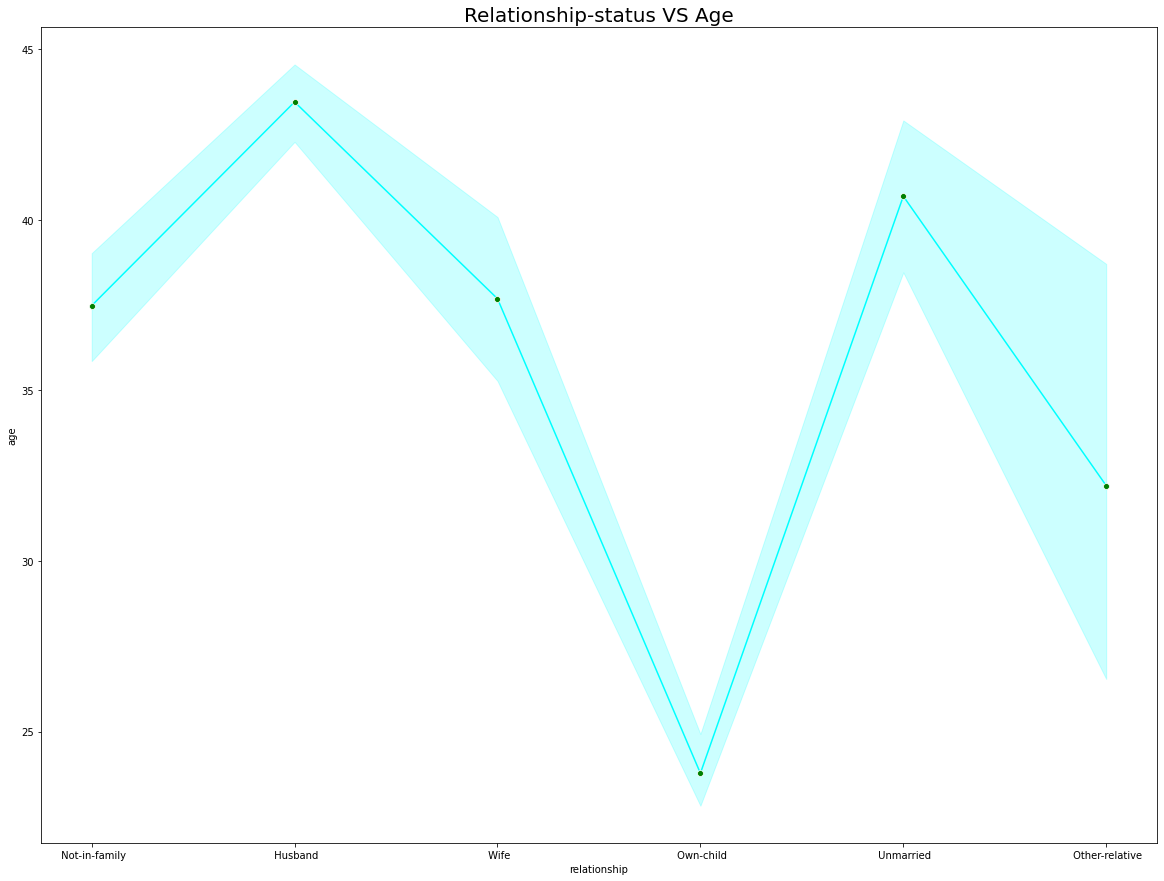

In [ ]:
fig, a = plt.subplots(figsize=(20,15))
plt.title("Relationship-status VS Age", fontdict={'fontsize':20})
sns.lineplot(data=df_data, x='relationship', y='age', color= "Cyan", marker='o', markerfacecolor='Green')